In [3]:
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
import keras

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Using TensorFlow backend.


In [4]:
dataset = numpy.loadtxt("dota2Test.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,4:116]
Y = dataset[:,0]
q=[]
for w in Y:
    if(w==-1):
        q.append(0)
    else:
        q.append(1)

In [5]:
dataset2 = numpy.loadtxt("dota2Train.csv", delimiter=",")
# split into input (X) and output (Y) variables
X2 = dataset2[:,4:116]
Y2 = dataset2[:,0]
q2=[]
for w in Y2:
    if(w==-1):
        q2.append(0)
    else:
        q2.append(1)

# Model

In [4]:
# create model
model = Sequential()
model.add(Dense(112, input_dim=112, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
# Compile model
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])


/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(112, input_dim=112, activation="relu", kernel_initializer="uniform")`
  app.launch_new_instance()
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`


In [5]:
# Fit the model
model.fit(X2, q2, nb_epoch=20, batch_size=10,  verbose=2)

/home/gautham/singularity/env/lib/python3.5/site-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
12s - loss: 0.6676 - acc: 0.5907
Epoch 2/20
14s - loss: 0.6634 - acc: 0.5998
Epoch 3/20
13s - loss: 0.6607 - acc: 0.6040
Epoch 4/20
14s - loss: 0.6566 - acc: 0.6087
Epoch 5/20
15s - loss: 0.6507 - acc: 0.6163
Epoch 6/20
12s - loss: 0.6442 - acc: 0.6233
Epoch 7/20
12s - loss: 0.6376 - acc: 0.6274
Epoch 8/20
12s - loss: 0.6298 - acc: 0.6360
Epoch 9/20
11s - loss: 0.6235 - acc: 0.6433
Epoch 10/20
11s - loss: 0.6168 - acc: 0.6488
Epoch 11/20
13s - loss: 0.6113 - acc: 0.6542
Epoch 12/20
13s - loss: 0.6058 - acc: 0.6572
Epoch 13/20
11s - loss: 0.6009 - acc: 0.6612
Epoch 14/20
11s - loss: 0.5969 - acc: 0.6652
Epoch 15/20
12s - loss: 0.5929 - acc: 0.6683
Epoch 16/20
12s - loss: 0.5886 - acc: 0.6733
Epoch 17/20
11s - loss: 0.5849 - acc: 0.6739
Epoch 18/20
11s - loss: 0.5811 - acc: 0.6771
Epoch 19/20
11s - loss: 0.5783 - acc: 0.6798
Epoch 20/20
12s - loss: 0.5750 - acc: 0.6827


# Testing accuracy

In [6]:
scores = model.evaluate(X, q)
print ("Accuracy: %.4f%%" %(scores[1]*100))
scores

 9344/10294 [==========================>...] - ETA: 0sAccuracy: 56.1298%


[0.76732558793689942, 0.56129784338076372]

# Training Accuracy

In [7]:
scores = model.evaluate(X2, q2)
print ("Accuracy: %.4f%%" %(scores[1]*100))
scores

91648/92650 [============================>.] - ETA: 0s 

[0.55101425592151776, 0.70331354560430026]

# Plotting number of hidden layers vs error 


In [8]:
err = []
err2=[]
e=[]
e2=[]
val=[]
for l in range(1,30):
    # create model
    model = Sequential()
    model.add(Dense(112, input_dim=112, init='uniform', activation='relu'))
    model.add(Dense(l, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    # Compile model
    adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    # Fit the model
    model.fit(X, q)
    scores = model.evaluate(X, q)
    print ("Accuracy: %.4f%%" %(scores[1]*100))
    val.append(l)
    err.append(scores[1]*100)
    e.append(scores[1]*100)
    scores = model.evaluate(X2, q2)
    print ("Accuracy: %.4f%%" %(scores[1]*100))
    err2.append(scores[1]*100)
    e2.append(scores[1]*100)


/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(112, input_dim=112, activation="relu", kernel_initializer="uniform")`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6844 - acc: 0.5344      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6830 - acc: 0.5535      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6836 - acc: 0.5409      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 1s - loss: 0.6820 - acc: 0.5602      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6826 - acc: 0.5562      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6805 - acc: 0.5603      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6806 - acc: 0.5600      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6808 - acc: 0.5569      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(9, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 1s - loss: 0.6805 - acc: 0.5557      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6796 - acc: 0.5606      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(11, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6792 - acc: 0.5622      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6817 - acc: 0.5554      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(13, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 1s - loss: 0.6794 - acc: 0.5676      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(14, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6784 - acc: 0.5683      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 1s - loss: 0.6814 - acc: 0.5537       

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6786 - acc: 0.5630      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(17, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 1s - loss: 0.6789 - acc: 0.5622       

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(18, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6810 - acc: 0.5548      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(19, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 1s - loss: 0.6798 - acc: 0.5563       

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 1s - loss: 0.6792 - acc: 0.5631       

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(21, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 1s - loss: 0.6780 - acc: 0.5616       

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(22, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 1s - loss: 0.6804 - acc: 0.5573       

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(23, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 1s - loss: 0.6776 - acc: 0.5687       

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(24, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 1s - loss: 0.6777 - acc: 0.5649       

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 1s - loss: 0.6789 - acc: 0.5611       

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(26, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 1s - loss: 0.6778 - acc: 0.5705       

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(27, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 1s - loss: 0.6791 - acc: 0.5615       

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(28, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 1s - loss: 0.6779 - acc: 0.5675       

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(29, activation="relu", kernel_initializer="uniform")`


Epoch 1/10
10294/10294 [==============================] - 1s - loss: 0.6780 - acc: 0.5684       

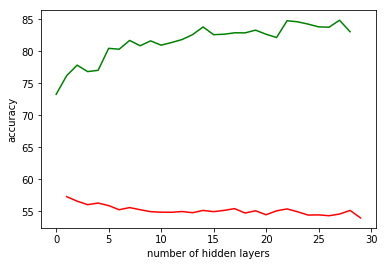

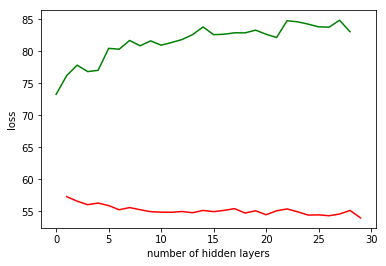

In [9]:
import matplotlib.pyplot as plt
plt.plot(val,err2,'r',err,'g')
plt.ylabel('accuracy')
plt.xlabel('number of hidden layers')
plt.show()
plt.plot(val,e2,'r',e,'g')
plt.ylabel('loss')
plt.xlabel('number of hidden layers')
plt.show()



In [20]:
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [21]:
import time
times = []
val=[]
err=[]
e=[]
err2=[]
e2=[]
for l in range(1,30):
    # create model
    model = Sequential()
    model.add(Dense(112, input_dim=112, init='uniform', activation='relu'))
    model.add(Dense(8, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    # Compile model
    adam = keras.optimizers.Adam(lr=l/1000, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    # Fit the model
    time_callback = TimeHistory()
    model.fit(X,q,  nb_epoch=1, batch_size=1,  verbose=2,callbacks=[time_callback])
    times.append(time_callback.times)
    scores = model.evaluate(X, q)
    print ("Accuracy: %.4f%%" %(scores[1]*100))
    val.append(l)
    err.append(scores[1]*100)
    e.append(scores[0]*100)
    scores = model.evaluate(X2, q2)
    print ("Accuracy: %.4f%%" %(scores[1]*100))
    err2.append(scores[1]*100)
    e2.append(scores[0]*100)

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(112, kernel_initializer="uniform", activation="relu", input_dim=112)`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, kernel_initializer="uniform", activation="relu")`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="sigmoid")`
/home/gautham/singularity/env/lib/python3.5/site-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1
15s - loss: 0.6759 - acc: 0.5719
91744/92650 [============================>.] - ETA: 0s

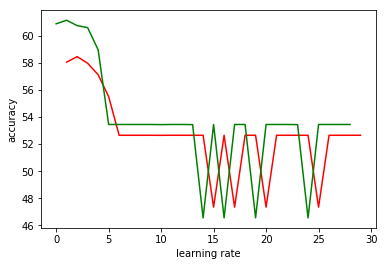

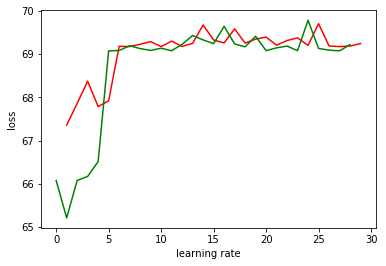

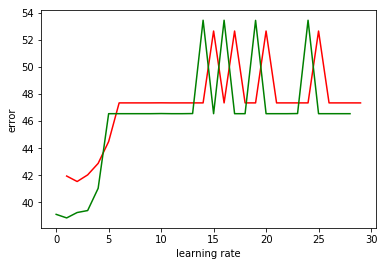

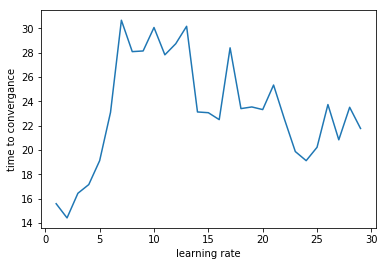

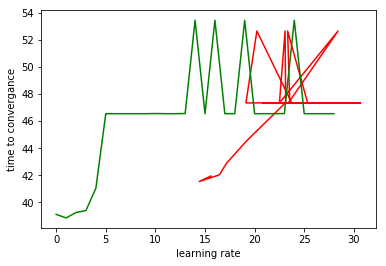

In [22]:
import matplotlib.pyplot as plt
plt.plot(val,err2,'r',err,'g')
plt.ylabel('accuracy')
plt.xlabel('learning rate')
plt.show()
plt.plot(val,e2,'r',e,'g')
plt.ylabel('loss')
plt.xlabel('learning rate')
plt.show()
a=[]
for e in err:
    a.append(100-e)
a2=[]
for e in err2:
    a2.append(100-e)
plt.plot(val,a2,'r',a,'g')
plt.ylabel('error')
plt.xlabel('learning rate')
plt.show()
plt.plot(val,times)
plt.ylabel('time to convergance')
plt.xlabel('learning rate')
plt.show()
plt.plot(times,a2,'r',a,'g')
plt.ylabel('time to convergance')
plt.xlabel('learning rate')
plt.show()



In [6]:
err = []
err2=[]
e=[]
e2=[]
val=[]
for l in range(1,200,10):
    # create model
    model = Sequential()
    model.add(Dense(112, input_dim=112, init='uniform', activation='relu'))
    model.add(Dense(l, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    # Compile model
    adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    # Fit the model
    model.fit(X, q)
    scores = model.evaluate(X, q)
    print ("Accuracy: %.4f%%" %(scores[1]*100))
    val.append(l)
    err.append(scores[1]*100)
    e.append(scores[0]*100)
    scores = model.evaluate(X2, q2)
    print ("Accuracy: %.4f%%" %(scores[1]*100))
    err2.append(scores[1]*100)
    e2.append(scores[0]*100)


/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(112, kernel_initializer="uniform", activation="relu", input_dim=112)`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="relu")`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="sigmoid")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6918 - acc: 0.5343      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(11, kernel_initializer="uniform", activation="relu")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6815 - acc: 0.5566      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(21, kernel_initializer="uniform", activation="relu")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6781 - acc: 0.5681      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(31, kernel_initializer="uniform", activation="relu")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6787 - acc: 0.5625      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(41, kernel_initializer="uniform", activation="relu")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6778 - acc: 0.5655      
Epoch 2/10
10294/10294 [==============================] - 0s - loss: 0.65

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(51, kernel_initializer="uniform", activation="relu")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6777 - acc: 0.5638      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(61, kernel_initializer="uniform", activation="relu")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6773 - acc: 0.5641      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(71, kernel_initializer="uniform", activation="relu")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6789 - acc: 0.5613      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(81, kernel_initializer="uniform", activation="relu")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6749 - acc: 0.5698      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(91, kernel_initializer="uniform", activation="relu")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6760 - acc: 0.5707      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(101, kernel_initializer="uniform", activation="relu")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6769 - acc: 0.5668      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(111, kernel_initializer="uniform", activation="relu")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6789 - acc: 0.5642      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(121, kernel_initializer="uniform", activation="relu")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6765 - acc: 0.5658      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(131, kernel_initializer="uniform", activation="relu")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6765 - acc: 0.5714      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(141, kernel_initializer="uniform", activation="relu")`


Epoch 1/10
10294/10294 [==============================] - 1s - loss: 0.6760 - acc: 0.5707      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(151, kernel_initializer="uniform", activation="relu")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6787 - acc: 0.5658      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(161, kernel_initializer="uniform", activation="relu")`


Epoch 1/10
10294/10294 [==============================] - 1s - loss: 0.6765 - acc: 0.5719       

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(171, kernel_initializer="uniform", activation="relu")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6762 - acc: 0.5705      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(181, kernel_initializer="uniform", activation="relu")`


Epoch 1/10
10294/10294 [==============================] - 0s - loss: 0.6775 - acc: 0.5685      

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(191, kernel_initializer="uniform", activation="relu")`


Epoch 1/10
10294/10294 [==============================] - 1s - loss: 0.6754 - acc: 0.5715      

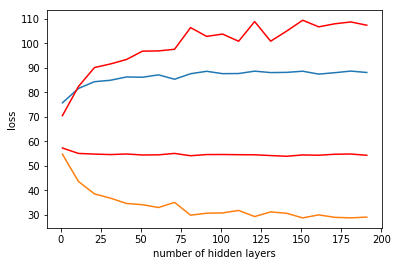

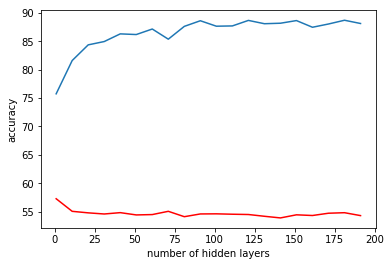

In [13]:
import matplotlib.pyplot as plt
plt.plot(val,e2,'r')
plt.plot(val,e)
plt.ylabel('loss')
plt.xlabel('number of hidden layers')
plt.show()
plt.plot(val,err2,'r')
plt.plot(val,err)
plt.ylabel('accuracy')
plt.xlabel('number of hidden layers')
plt.show()

In [2]:
e

NameError: name 'e' is not defined